## Mechanics G520 - Homework 4

#### **Problems 1 and 2 - Lithospheric Flexure**

I will use the flexure equation for lithoshere to solve this problem. The flexure equation is given by:

$$
\begin{equation}
    v(x) = e^{\alpha x} [c_1\cdot \cos(\alpha x) + c_2\cdot \sin(\alpha x)] + e^{-\alpha x} [c_3\cdot \cos(\alpha x) + c_4\cdot \sin(\alpha x)] 
    \begin{cases}
    c_1=c_2       & \quad \forall x\geq 0 \\
    c_3=c_4  & \quad \forall x<0
  \end{cases}
  \tag{1}
\end{equation}
$$

where $\alpha = \left[\frac{4\cdot D}{\rho g}\right]^{-\frac{1}{4}}$, $D = \frac{ET^3}{12}$ is the rigidity, and $v(x)$ is the deflection of the beam at a distance $x$ from its center. The constants $c_1$, $c_2$, $c_3$ and $c_4$ are determined by the boundary conditions of the problem. The general solution can be written as:

$$
\begin{equation}
    \begin{cases}
    e^{-\alpha x} [\cos(\alpha x) + \sin(\alpha x)]       & \quad x\geq 0  \\
    e^{\alpha x} [\cos(\alpha x) + \sin(\alpha x)]        & \quad x < 0
  \end{cases}
  \tag{2}
\end{equation}
$$

Minimum elevation: -4.353
Distance to minimum elevation: 298.7257


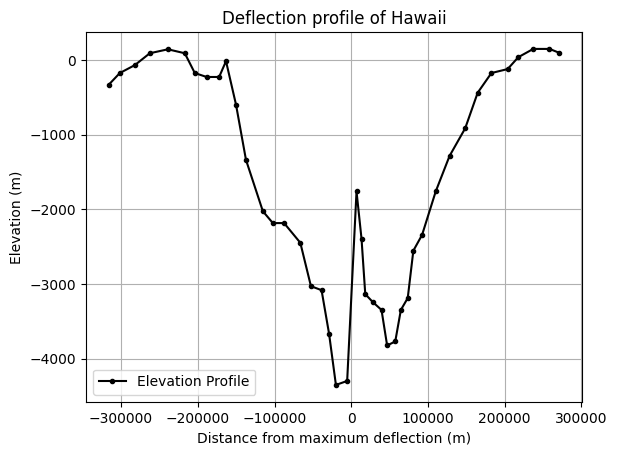

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Load data from hawaii file
data = np.loadtxt('hawaii_top.txt', skiprows=1)

# Check the minimum elevation
min_elevation = np.min(data[:,1])
print('Minimum elevation:', min_elevation)

#Get the index of the minimum elevation then evaluate min distance
min_elevation_index = np.argmin(data[:,1])
min_elevation_distance = data[min_elevation_index,0]
print('Distance to minimum elevation:', min_elevation_distance)

# Subtract the distance from minimum elevation to all distances to center the distances around the minimum elevation
# I applied a constant shift of 20 because the minimum elevation is not quite at the center of the profile, in my opinion
const_shift = 20
data[:,0] = data[:,0] - min_elevation_distance - const_shift

# Multiply the x and y axes by 1000 to convert to meters
data[:,0] = data[:,0] * 1000
data[:,1] = data[:,1] * 1000

# Plot the elevation profile
plt.plot(data[:,0], data[:,1], 'k.-', label='Elevation Profile')
plt.xlabel('Distance from maximum deflection (m)')
plt.ylabel('Elevation (m)')
plt.title('Deflection profile of Hawaii')
plt.legend()
plt.grid(True) 
plt.show()



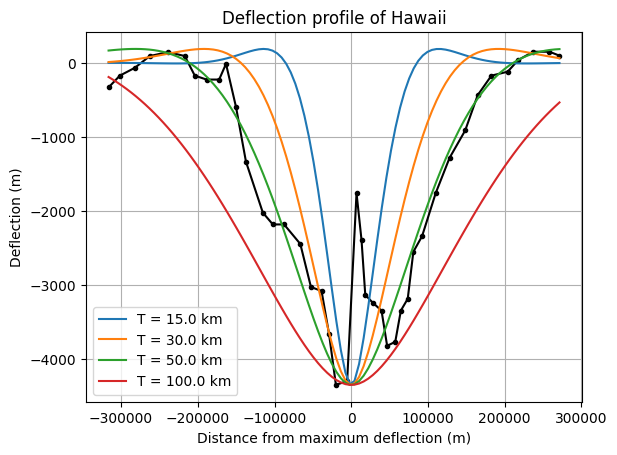

In [2]:
# Declaring a few constants needed later on
V0 = min_elevation * 1000  ; # Initial deflection in meters
E = 50e9 ; # Young's modulus in Pascals
rho_m = 3300 ; # Density in kg/m^3
g = 9.81 ; # Gravitational acceleration in m/s^2
x = np.linspace(min(data[:,0]), max(data[:,0]), 100) # x measured from max deflection point

# Now, I'll define a function to estimate the deflection profile. 
# The function will take in the x values, the plate thickness T, the Young's modulus E, the density, and the gravitational acceleration as inputs and return the deflection profile.

def deflection_profile(x, T, E, rho_m, g, V0):
    D = (E*(T**3)/(12))
    alpha = ((4*D)/(rho_m*g))**(-1/4)
    deflection = np.piecewise(x, [x >= 0, x < 0], 
                              [lambda x: V0*np.exp(-alpha*x)*(np.cos(alpha*x) + np.sin(alpha*x)), 
                               lambda x: V0*np.exp(alpha*x)*(np.cos(alpha*x) - np.sin(alpha*x))])
    #print(alpha)
    return deflection

# Plate thicknesses to test
T = [15e3, 30e3, 50e3, 100e3]

# Deflection profiles for each plate thickness together with the actual elevation profile
plt.plot(data[:,0], data[:,1], 'k.-')
for t in T:
    plt.plot(x, deflection_profile(x, t, E, rho_m, g, V0), label='T = ' + str(t/1000) + ' km')
    plt.xlabel('Distance from maximum deflection (m)')
    plt.ylabel('Deflection (m)')
    plt.title('Deflection profile of Hawaii')
    plt.grid(True)  
    plt.legend()
plt.show()



Best fit for plate thickness: 51.21 km
RMS error: 597.84 m


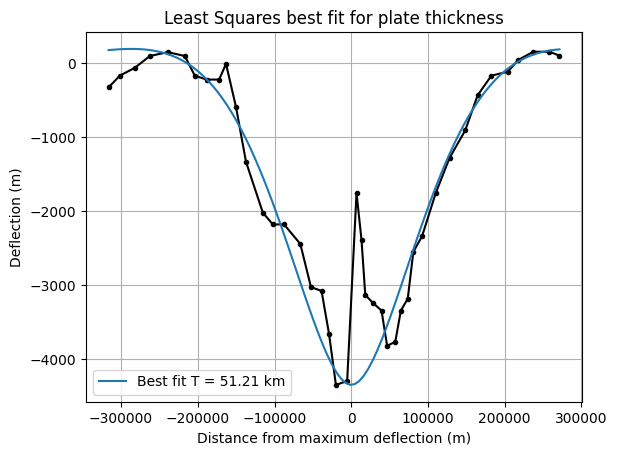

In [3]:
# Here I use Least Squares to find the best fit for the plate thickness

# Defining the objective function (sum of resisuals squared)
def objective(T, x, deflection, E, rho_m, g, V0):
    return np.sum((deflection - deflection_profile(x, T, E, rho_m, g, V0))**2)

# Use the scipy.optimize.minimize function to find the best fit for the plate thickness
from scipy.optimize import minimize
T0 = 50e3
res = minimize(objective, T0, args=(data[:,0], data[:,1], E, rho_m, g, V0))
best_T = res.x[0] # The best fit for the plate thickness is the first element of the result
print('Best fit for plate thickness:', float("{:.2f}".format(best_T/1000)), 'km')
# Print rms error of the best fit thickness 
rms_error = np.sqrt(res.fun/len(data[:,0]))
print('RMS error:', str(float("{:.2f}".format(rms_error))) + ' m')

# Plot of the best fit together with the elevation profile
plt.plot(data[:,0], data[:,1], 'k.-')
plt.plot(x, deflection_profile(x, best_T, E, rho_m, g, V0), label='Best fit T = ' + str(float("{:.2f}".format(best_T/1000))) + ' km') 
plt.xlabel('Distance from maximum deflection (m)')
plt.ylabel('Deflection (m)')
plt.title('Least Squares best fit for plate thickness')
plt.grid(True)  
plt.legend()
plt.show()

Minimum elevation: -4900.0
Maximum elevation: -320.0
Distance to minimum and maximum elevations: 40.0 260.0


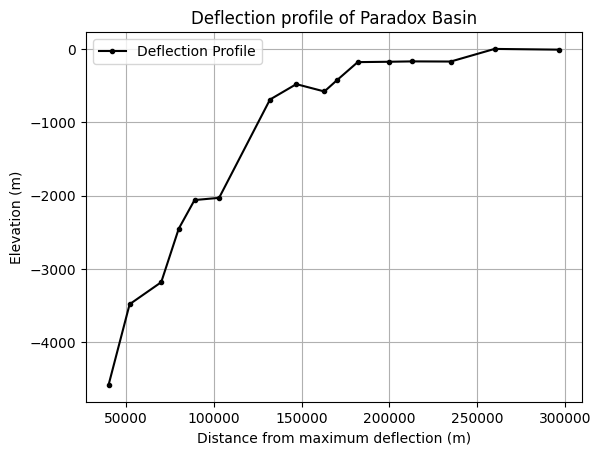

In [4]:
# Load data from Paradox_basin.txt 
data = np.loadtxt('Paradox_basin.txt', skiprows=1, delimiter=',')

# Check the minimum and maximum elevations
min_elevation = np.min(data[:,1])
print('Minimum elevation:', min_elevation)
max_elevation = np.max(data[:,1])
print('Maximum elevation:', max_elevation)

# Get the index of the minimum and maximum elevation then evaluate the distance
min_elevation_index = np.argmin(data[:,1])
min_elevation_distance = data[min_elevation_index,0]
max_elevation_index = np.argmax(data[:,1])
max_elevation_distance = data[max_elevation_index,0]
print('Distance to minimum and maximum elevations:', min_elevation_distance, max_elevation_distance)

# Subtract min elevation from all elevations 
#data[:,0] = data[:,0] - min_elevation_distance
data[:,1] = data[:,1] - max_elevation

# Multiplying the x and y axes by 1000 to convert to meters
data[:,0] = data[:,0] * 1000

# Plot of the elevation profile
plt.plot(data[:,0], data[:,1], 'k.-', label='Deflection Profile')
plt.xlabel('Distance from maximum deflection (m)')
plt.ylabel('Elevation (m)')
plt.title('Deflection profile of Paradox Basin')
plt.legend()
plt.grid(True) 
plt.show()

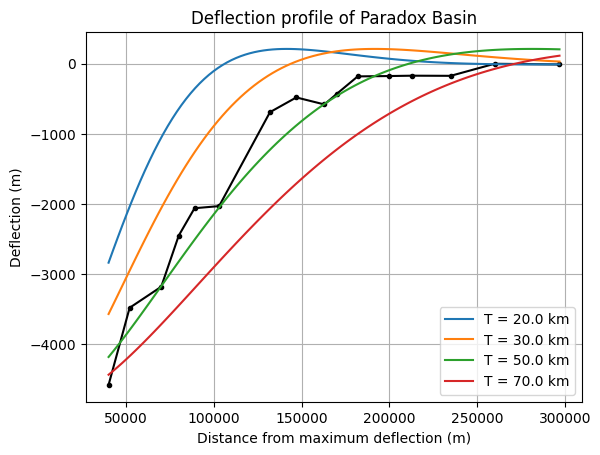

In [5]:
# Declaring a few constants needed later on
V0 = min_elevation  ; # Initial deflection in meters
E = 50e9 ; # Young's modulus in Pascals
rho_m = 3300 ; # Density in kg/m^3
g = 9.81 ; # Gravitational acceleration in m/s^2
x = np.linspace(min(data[:,0]), max(data[:,0]), 100) # x measured from max deflection point

# Plate thicknesses to test
T = [20e3, 30e3, 50e3, 70e3]

# Plot the deflection profile for each plate thickness on the same figure together with the elevation profile
plt.plot(data[:,0], data[:,1], 'k.-')
for t in T:
    plt.plot(x, deflection_profile(x, t, E, rho_m, g, V0), label='T = ' + str(t/1000) + ' km')
    plt.xlabel('Distance from maximum deflection (m)')
    plt.ylabel('Deflection (m)')
    plt.title('Deflection profile of Paradox Basin')
    plt.grid(True)  
    plt.legend()
plt.show()



Best fit for plate thickness: 45.82 km
RMS error: 243.63 m


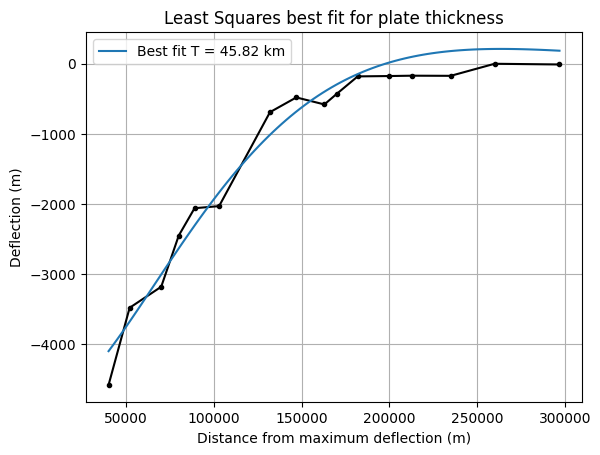

In [6]:
# Here I use Least Squares, as before, to find the best fit for the plate thickness

T0 = 50e3
res = minimize(objective, T0, args=(data[:,0], data[:,1], E, rho_m, g, V0))
best_T = res.x[0] # The best fit for the plate thickness is the first element of the result
print('Best fit for plate thickness:', float("{:.2f}".format(best_T/1000)), 'km')
# Print rms error of the best fit thickness 
rms_error = np.sqrt(res.fun/len(data[:,0]))
print('RMS error:', str(float("{:.2f}".format(rms_error))) + ' m')

# Plot the best fit together with the elevation profile
plt.plot(data[:,0], data[:,1], 'k.-')
plt.plot(x, deflection_profile(x, best_T, E, rho_m, g, V0), label='Best fit T = ' + str(float("{:.2f}".format(best_T/1000))) + ' km') 
plt.xlabel('Distance from maximum deflection (m)')
plt.ylabel('Deflection (m)')
plt.title('Least Squares best fit for plate thickness')
plt.grid(True)  
plt.legend()
plt.show()

#### **Problems 3 and 4 - Heat Flow**

I will use the heat flow equation for lithoshere to solve this problem. The heat flow equation is given by:

$$
\begin{equation}
    T(x,t) = \frac{T_0}{2} \left[ erf \left(\frac{x+a}{2\sqrt{\kappa t}}\right) - erf \left(\frac{x-a}{2\sqrt{\kappa t}}\right)  \right]
  \tag{3}
\end{equation}
$$

where T(x,t) is the temperature at a distance $x$ from the heat source at time $t$, $T_0$ is the initial temperature, $erf$ is the error function, $\kappa$ is the thermal diffusivity, and $a$ is the radius of the dyke. 

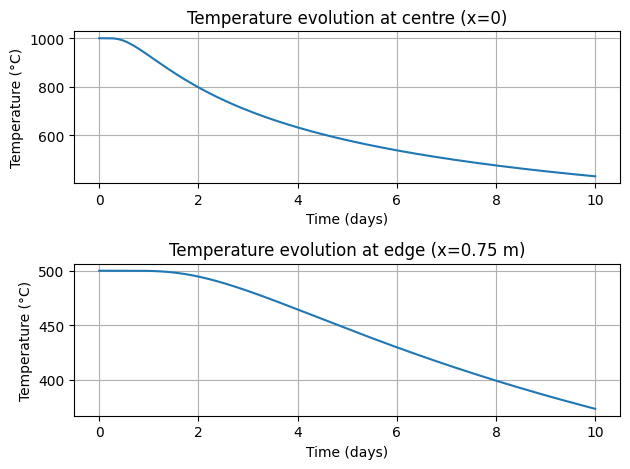

Time when the temperature at the centre and edge of the dyke reaches 900°C: 29.083717050383715 hours and 0.016666666666666666 hours, respectively


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define variables for dyke intrusion problem
dyke_width = 1.5  # meters
melting_T = 1000  # Celsius
crist_T = 900  # Celsius
kappa_basalt = 1e-6  # m^2/s
a = dyke_width / 2  # Radius of the dyke in meters

# Function to compute a heat flow profile
def heat_flow_profile(T0, x, kappa, t, a):
    return (T0 / 2) * (math.erf((x + a) / (2 * math.sqrt(kappa * t))) - math.erf((x - a) / (2 * math.sqrt(kappa * t))))

# Time range for observation: from 1 minute to 10 days in seconds with 100 steps
times = np.linspace(60, (10* 24 * 60 * 60), 1000)

# Calculate temperature over time at x=0 and x=a
T_at_center = [heat_flow_profile(melting_T, 0, kappa_basalt, t, a) for t in times]
T_at_edge = [heat_flow_profile(melting_T, a, kappa_basalt, t, a) for t in times]

# Plotting
fig, axs = plt.subplots(2, 1)

# Plot for x=0 (centre of the dyke)
axs[0].plot(times / (24 * 3600), T_at_center)  # Convert time to days
axs[0].set_title('Temperature evolution at centre (x=0)')
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_xscale('linear')
axs[0].grid(True)

# Plot for x=a (edge of the dyke)
axs[1].plot(times / (24 * 3600), T_at_edge)  # Convert time to days 
axs[1].set_title(f'Temperature evolution at edge (x={a} m)')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Temperature (°C)')
axs[1].set_xscale('linear')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Find the time when the temperature at the centre reaches 900 Celsius
time_when_900_center = None
for t, T in zip(times, T_at_center):
    if T <= crist_T:
        time_when_900_center = t
        break

# Find the time when the temperature at the centre reaches 900 Celsius
time_when_900_edge = None
for t, T in zip(times, T_at_edge):
    if T <= crist_T:
        time_when_900_edge = t
        break

# Convert time to days 
time_when_900_center_hours = time_when_900_center / (60*60)
time_when_900_edge_hours = time_when_900_edge / (60*60)

# Print the result
print(f"Time when the temperature at the centre and edge of the dyke reaches 900°C: {time_when_900_center_hours} hours and {time_when_900_edge_hours} hours, respectively")

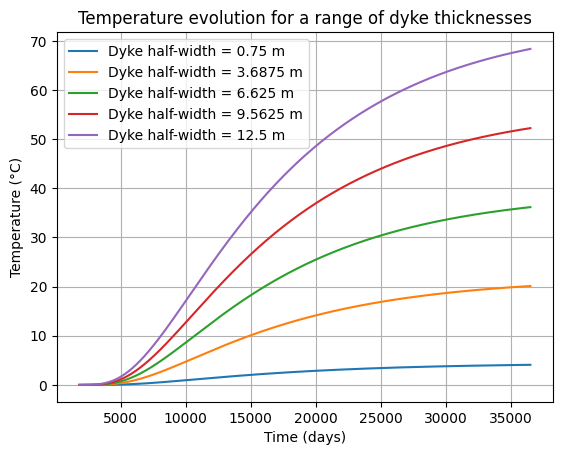

It is unlikely the temperature they measured at the bottom of the well is due to the dyke intrussion.
Those temperatures might me associated with hydrothermal fluid circulation


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Given variables
magma_temp = 1200  # Assumed magma temperature in Celsius
kappa_hawaian_basalt = 1e-6  # Assumed thermal diffusivity of Hawaiian basalt in m^2/s
well_distance = 100  # Distance from the dyke to the well in meters
dyke_width_ranges = np.linspace(1.5, 25, 5)  # Range of dyke thicknesses in meters
a_array = dyke_width_ranges / 2  # Array of dyke radii

# Time range for observation: from 5 years 100 years in seconds 
times = np.linspace(5 * 365 * 24 * 60 * 60, 100 * 365 * 24 * 60 * 60, 1000)

# Function to compute a heat flow profile
def heat_flow_profile(T0, x, kappa, t, a):
    return (T0 / 2) * (math.erf((x + a) / (2 * math.sqrt(kappa * t))) - math.erf((x - a) / (2 * math.sqrt(kappa * t))))

# Plotting
plt.figure()

# Loop over dyke thicknesses
for a in a_array:
    # Calculate temperature over time at the well distance for each dyke thickness
    T_at_well = [heat_flow_profile(magma_temp, well_distance, kappa_hawaian_basalt, t, a) for t in times]
    # Plot
    plt.plot(times / (24 * 3600), T_at_well, label=f'Dyke half-width = {a} m')

plt.xlabel('Time (days)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature evolution for a range of dyke thicknesses')
plt.legend()
plt.xscale('linear')
plt.grid(True)
plt.show()

print("It is unlikely the temperature they measured at the bottom of the well is due to the dyke intrussion.\nThose temperatures might me associated with hydrothermal fluid circulation")
